<a href="https://colab.research.google.com/github/brunolunarj/cienciadedados/blob/main/MPV012023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP PUCRIO - Sprint I: Análise de Dados e Boas Práticas**

## 1 - DEFINIÇÃO DO PROBLEMA
---




O **Instituto Nacional de Seguro Social - INSS** caracteriza-se como uma organização pública prestadora de serviços previdenciários para a sociedade brasileira.
Fazer análise dos dados Previdenciários dos benefícios de **Auxílio-Doença (B31) e Auxílio-Doença por Acidente de trabalho (B91), *CONCEDIDOS* no ano de 2022** pelo **INSS** e verificar insigts para melhorar a análise e concessão dos benefícios por incapacidade. 
Os dados foram retirados do sistema de Banco de Dados interno nos moldes do fornecido no  Dados Abertos do Instituto (https://dados.gov.br/dados/organizacoes/visualizar/instituto-nacional-de-seguro-social-inss).



**Dicionário de Dados - Atributos (COLUNAS)**
>**0   Competência concessão** - Mês que foi concedido o benefício <br>
>**1   Espécie** - Espécie do benefício Previdenciário <br>
>**2   CID** - Codigo Internacional de Doenças <br>
>**3   Despacho** - Tipo de concessão <br>
>**4   Dt Nascimento** - Data de nascimento do benefício <br>
>**5   Sexo.** - Sexo Masculino ou Feminino <br>
>**6   Clientela** - Especificação do benefício por zona (Rural e Urbana) <br>
>**7   Tipo de Cálculo** - Como é calculado do benefício <br>
>**8   Mun. Resid.** - Município do Segurado do benefício <br>
>**9   Estado** - Estado do Segurado do benefício <br>
>**10  Forma Filiação** - Filiação do Segurado no momento da concessão <br>
>**11  Qt SM RMI** - Quantidade de Salário Mínimo da RMI <br>

## 2 - COLETA E ANÁLISE INICIAL DOS DADOS

---



### 2.1 - IMPORTAÇÃO DE PACOTES E COLETA DOS DADOS

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from tqdm import tqdm
#from google.colab import drive

#Carregando planilhas do Excel com os dados em dataframes
df_ben =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC012022.xlsx?raw=true')
#pbar = tqdm(4, position=0, leave=True)
#pbar.update()
df_ben2 =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC022022.xlsx?raw=true')
df_ben3 =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC032022.xlsx?raw=true')
df_ben4 =  pd.read_excel('https://github.com/brunolunarj/cienciadedados/blob/d3d94b0a5b2dd1a5aff4d85bf269c67390e23927/Con2022/CONC042022.xlsx?raw=true')
#df_ben =  pd.read_excel('CONC012022.xlsx')
#df_ben2 =  pd.read_excel('CONC022022.xlsx')
#df_ben3 =  pd.read_excel('CONC032022.xlsx')
#df_ben4 =  pd.read_excel('CONC042022.xlsx')
df_ben4.shape
display(df_ben[:2])
display(df_ben2[:2])
display(df_ben3[:2])
display(df_ben4[:2])

,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202201,Auxílio Doenca Previdenciário,K40 Hernia Inguinal,Revisao Administrativa,1970-05-23,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Desempregado,1.183
1,202201,Auxílio Doenca Previdenciário,I25.9 Doenc Isquemica Cronica do Coracao Ne,Concessao Normal,1962-08-31,Masculino,Rural,Rmi Informada/Salã¡Rio M,Batalha,AL,Segurado Especial,1.000


,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202204,Auxílio Doenca Previdenciário,T92.8 Sequelas de Outr Traum Espec do Membro,Concessao Normal,1968-02-08,Feminino,Urbano,Calculo na Dib sem Fator,Maceió,AL,Doméstico,1.000
1,202204,Auxílio Doenca Previdenciário,S52.2 Frat da Diafise do Cubito,Concessao Normal,1998-01-15,Masculino,Urbano,Calculo na Dib sem Fator,Maceió,AL,Desempregado,1.305


,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202207,Auxílio Doenca Previdenciário,S42.2 Frat da Extremidade Super do Umero,Concessao Normal,2000-12-30,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Autônomo,1.0
1,202207,Auxílio Doenca Previdenciário,T93.1 Sequelas de Frat do Femur,Concessao Normal,1974-08-26,Masculino,Urbano,Calculo na Dib sem Fator,Delmiro Gouveia,AL,Desempregado,1.0


,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202210,Auxílio Doenca Previdenciário,S92.0 Frat do Calcaneo,Concessao Normal,1972-11-14,Feminino,Urbano,Calculo na Dib sem Fator,São Paulo,SP,Desempregado,1.0
1,202210,Auxílio Doenca Previdenciário,N20 Calculose do Rim e do Ureter,Revisao Administrativa,1972-04-20,Feminino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Empregado,1.0


### 2.2 - JUNTANDO AS PLANILHAS


In [2]:
#Criando um novo Dataframe e juntando os DF anteriores
df_ben = pd.concat([df_ben, df_ben2, df_ben3, df_ben4], ignore_index=True)
df_ben.head() #df_ben[:5]

,Competência concessão,Espécie,CID,Despacho,Dt Nascimento,Sexo.,Clientela,Tipo de Cálculo,Mun. Resid.,Estado,Forma Filiação,Qt SM RMI
0,202201,Auxílio Doenca Previdenciário,K40 Hernia Inguinal,Revisao Administrativa,1970-05-23,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Desempregado,1.183
1,202201,Auxílio Doenca Previdenciário,I25.9 Doenc Isquemica Cronica do Coracao Ne,Concessao Normal,1962-08-31,Masculino,Rural,Rmi Informada/Salã¡Rio M,Batalha,AL,Segurado Especial,1.000
2,202201,Auxílio Doenca Previdenciário,S92.4 Frat do Halux,Concessao Normal,1997-10-15,Masculino,Urbano,Rmi Informada/Salã¡Rio M,Arapiraca,AL,Empregado,1.000
3,202201,Auxílio Doenca Previdenciário,B34.2 Infecc p/Coronavirus Ne,Concessao Normal,1999-10-15,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Desempregado,1.000
4,202201,Auxílio Doenca Previdenciário,I83.2 Varizes Membros Infer c/Ulcera e Inflam,Revisao Administrativa,1975-04-04,Masculino,Urbano,Calculo na Dib sem Fator,Arapiraca,AL,Autônomo,1.000


### 2.3 - ANÁLISE INICIAL DOS DADOS


In [3]:
#Buscando as informações Básicas do DF: quantidade de linhas e colunas, os tipos de dados de cada coluna, etc.
df_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883139 entries, 0 to 1883138
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Competência concessão  int64         
 1   Espécie                object        
 2   CID                    object        
 3   Despacho               object        
 4   Dt Nascimento          datetime64[ns]
 5   Sexo.                  object        
 6   Clientela              object        
 7   Tipo de Cálculo        object        
 8   Mun. Resid.            object        
 9   Estado                 object        
 10  Forma Filiação         object        
 11  Qt SM RMI              float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 172.4+ MB


In [4]:
#Verificar todos os valores nulos do DF
df_ben.isnull().sum()

Competência concessão     0
Espécie                   0
CID                       0
Despacho                  0
Dt Nascimento             0
Sexo.                     0
Clientela                 0
Tipo de Cálculo           0
Mun. Resid.              18
Estado                    0
Forma Filiação            0
Qt SM RMI                 0
dtype: int64

In [5]:
#Verificar todos os valores NA do DF
df_ben.isna().sum()

Competência concessão     0
Espécie                   0
CID                       0
Despacho                  0
Dt Nascimento             0
Sexo.                     0
Clientela                 0
Tipo de Cálculo           0
Mun. Resid.              18
Estado                    0
Forma Filiação            0
Qt SM RMI                 0
dtype: int64

In [6]:
df_ben['Despacho'] = df_ben['Despacho'].str.strip()
list_despacho = df_ben['Despacho'].unique()
display(list_despacho)

array(['Revisao Administrativa', 'Concessao Normal', 'Acao Judicial',
       'Revisão Médica', 'Recurso', 'Concessao com Diligencia (Rd ou Sp)'],
      dtype=object)

In [7]:
df_ben['Competência concessão'].unique()

array([202201, 202202, 202203, 202204, 202205, 202206, 202207, 202208,
       202209, 202210, 202211, 202212])

## 3 - PRÉ-PROCESSAMENTO

---



### 3.1 - LIMPEZA DE DADOS

In [8]:
#Apagar coluna Tipo de Cálculo
df_ben = df_ben.drop(columns=['Tipo de Cálculo'])
df_ben.columns

Index(['Competência concessão', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento',
       'Sexo.', 'Clientela', 'Mun. Resid.', 'Estado', 'Forma Filiação',
       'Qt SM RMI'],
      dtype='object')

In [9]:
#Trocando os nomes das colunas
#lista_colunas = ['Competência concessão', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento','Sexo.', 'Clientela','Tipo de Cálculo', 'Mun. Resid.', 'Estado','Forma Filiação', 'Qt SM RMI']
#df_ben = df_ben[lista_colunas]
df_ben = df_ben.rename(columns={'Competência concessão':'Competência','Sexo.':'Sexo','Clientela':'Zona','Forma Filiação':'Filiação'})
df_ben.columns

Index(['Competência', 'Espécie', 'CID', 'Despacho', 'Dt Nascimento', 'Sexo',
       'Zona', 'Mun. Resid.', 'Estado', 'Filiação', 'Qt SM RMI'],
      dtype='object')

In [10]:
df_ben['CID'] = df_ben['CID'].str.strip() #Apaga espaços em branco no inicio e fim da linha conforme coluna
df_ben['Espécie'] = df_ben['Espécie'].str.strip()

In [11]:
#Apaga todas as linhas que tenham valor NaN (Missings)
df_ben = df_ben.dropna()
#df_ben.isna().sum()
df_ben.shape

(1883121, 11)

In [12]:
#Muda o Tipo da coluna competencia para Objeto (String) 
df_ben['Competência'] = df_ben['Competência'].astype(str)
df_ben['Competência'] = df_ben['Competência'].str.replace('2022','')
#df_ben.info()
list_competencia = df_ben['Competência'].unique()
display(list_competencia)

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [13]:
#Verificando os valores numéricos do atributo Qt SM RMI
df_ben['Qt SM RMI'].describe()

count    1.883121e+06
mean     1.423869e+00
std      6.924445e-01
min      9.000000e-02
25%      1.000000e+00
50%      1.140000e+00
75%      1.540000e+00
max      7.572000e+00
Name: Qt SM RMI, dtype: float64

### 3.2 - Plotando os gráficos

Text(0, 0.5, 'Total de Processos Concluído/Mês')

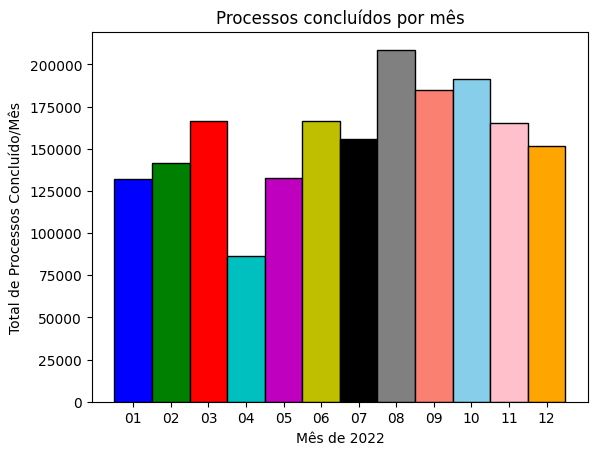

In [14]:
ax= sns.histplot(df_ben['Competência'])
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray','salmon','skyblue','pink','orange']
for i in range(0,12):
    ax.patches[i].set_facecolor(color[i])
plt.title('Processos concluídos por mês')
plt.xlabel('Mês de 2022')
plt.ylabel('Total de Processos Concluído/Mês')
#plt.legend(df_ben['Competência']); 

Text(0.5, 0, 'Mês de 2022')

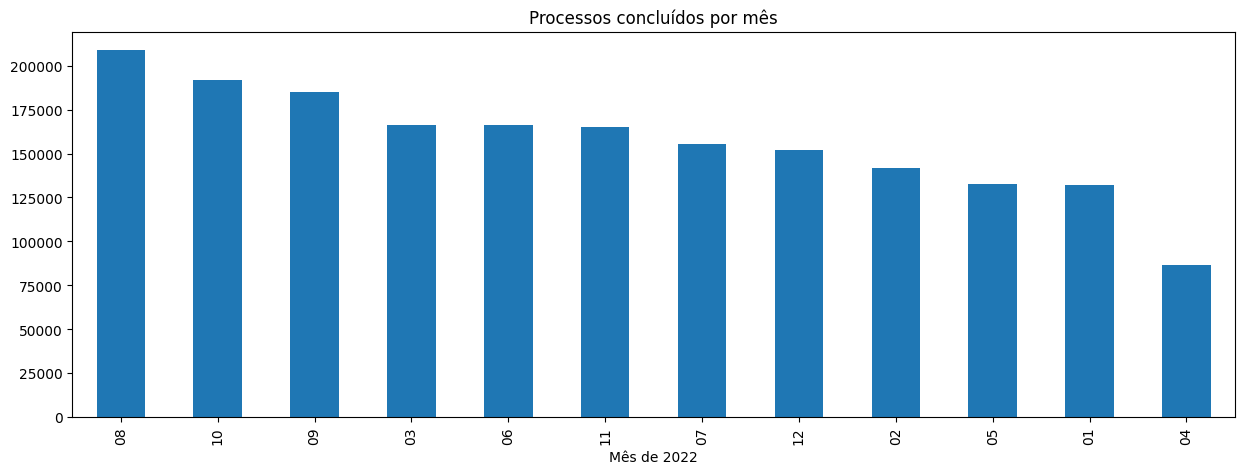

In [15]:
#Plota o gráfico em Histograma de processos concluídos por mês
#plt.hist(df_ben['Competência'], bins=12, edgecolor='yellow', color='blue') 
competencia = df_ben['Competência'].value_counts() #
competencia.plot(figsize=(15,5),kind='bar')
plt.title('Processos concluídos por mês')
plt.xlabel('Mês de 2022')
#plt.legend(title='Processos concluídos por mês'); 

In [16]:
#Plotar barra H competência
#plt.barh(df_ben['Competência'],df_ben['Competência'].sum())  
#grup_comp = df_ben.groupby('Competência').sum()
#display(grup_comp)
# incluindo título do gráfico e legenda
#plt.title('Processos concluídos por mês')
#plt.xlabel('Mês de 2022')
#plt.ylabel('Total de Processos Concluído/Mês')

Text(0.5, 0, 'Meses de 2022')

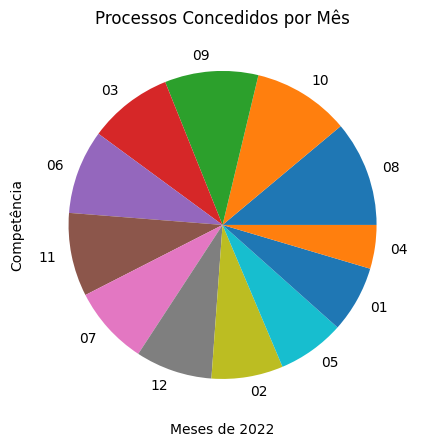

In [17]:
#Gráfico de Pizza de Benefícios concedidos por mês
competencia = df_ben['Competência'].value_counts()
competencia.plot(figsize=(15,5), kind='pie')
plt.title('Processos Concedidos por Mês')
plt.xlabel('Meses de 2022')

Text(0.5, 0, 'Espécies: B31 e B91')

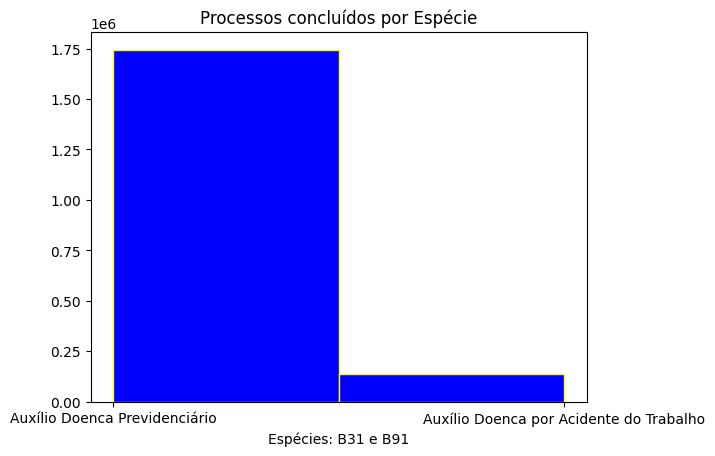

In [18]:
#Plota o gráfico em Histograma de processos concluídos por Espécie
plt.hist(df_ben['Espécie'], bins=2, edgecolor='yellow', color='blue') 
plt.title('Processos concluídos por Espécie')
plt.xlabel('Espécies: B31 e B91')
#plt.legend('B31');

Text(0.5, 0, 'Espécies')

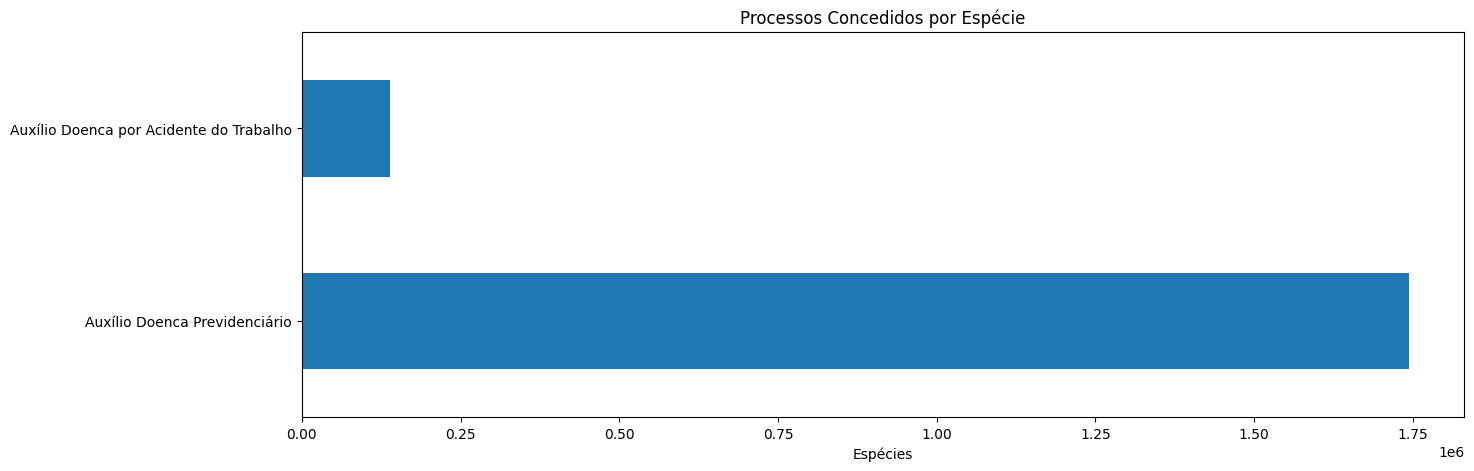

In [19]:
#Barra H de Espécies
#b31= df_ben.loc[df_ben['Espécie'] == 'Auxílio Doenca Previdenciário',['Espécie']].count()
#b91= df_ben.loc[df_ben['Espécie'] == 'Auxílio Doenca por Acidente do Trabalho',['Espécie']].count()
#plt.barh(df_ben['Competência'],df_ben['Competência'].sum())  
competencia = df_ben['Espécie'].value_counts()
competencia.plot(figsize=(15,5), kind='barh')
plt.title('Processos Concedidos por Espécie')
plt.xlabel('Espécies')


Concessao Normal                       1659047
Acao Judicial                           162432
Revisao Administrativa                   58387
Recurso                                   3212
Revisão Médica                              42
Concessao com Diligencia (Rd ou Sp)          1
Name: Despacho, dtype: int64

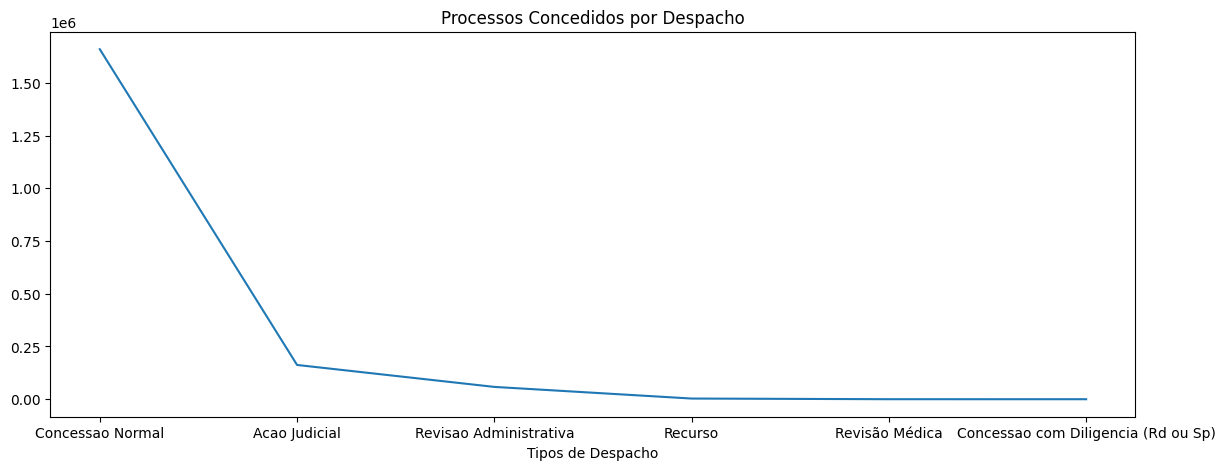

In [20]:
#QTD por despacho
despacho = df_ben['Despacho'].value_counts()
despacho.plot(figsize=(14,5))
plt.title('Processos Concedidos por Despacho')
plt.xlabel('Tipos de Despacho')
display(despacho)

Text(0.5, 0, 'Sexo')

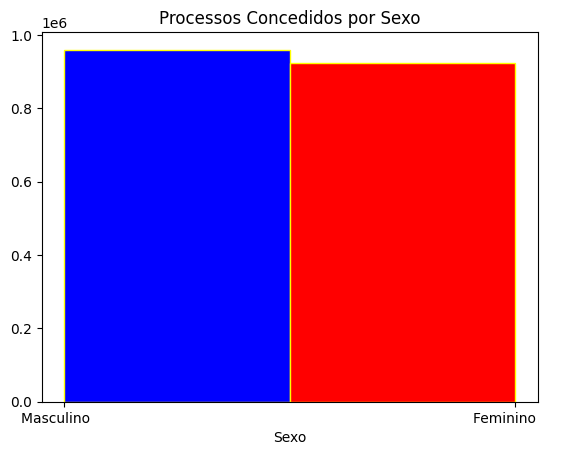

In [21]:
#Plota o gráfico em Histograma de processos concluídos por Sexo
fig, ax = plt.subplots()
cor = ['b','r']
#labels = ['Masc','Fem']
ax.hist(df_ben['Sexo'], bins=2, edgecolor='yellow') 
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])
ax.set_title('Processos Concedidos por Sexo')
ax.set_xlabel('Sexo')
#ax.legend(title='Sexo');

Text(0.5, 0, 'Filiação')

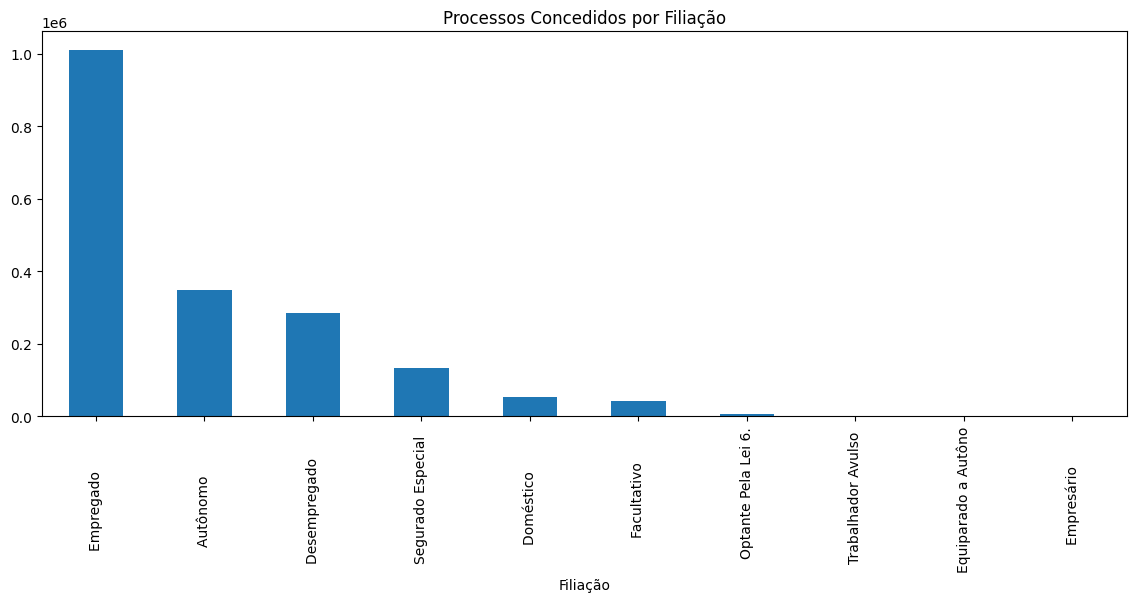

In [22]:
#Plota o gráfico em Histograma de processos concluídos por Filiação
#plt.hist(df_ben['Filiação'], bins=10, edgecolor='green', color='blue') 
df_ben['Filiação'].unique()
filiacao = df_ben['Filiação'].value_counts()
filiacao.plot(figsize=(14,5), kind='bar')
plt.title('Processos Concedidos por Filiação')
plt.xlabel('Filiação')
#plt.legend();

Text(0.5, 0, 'Estado')

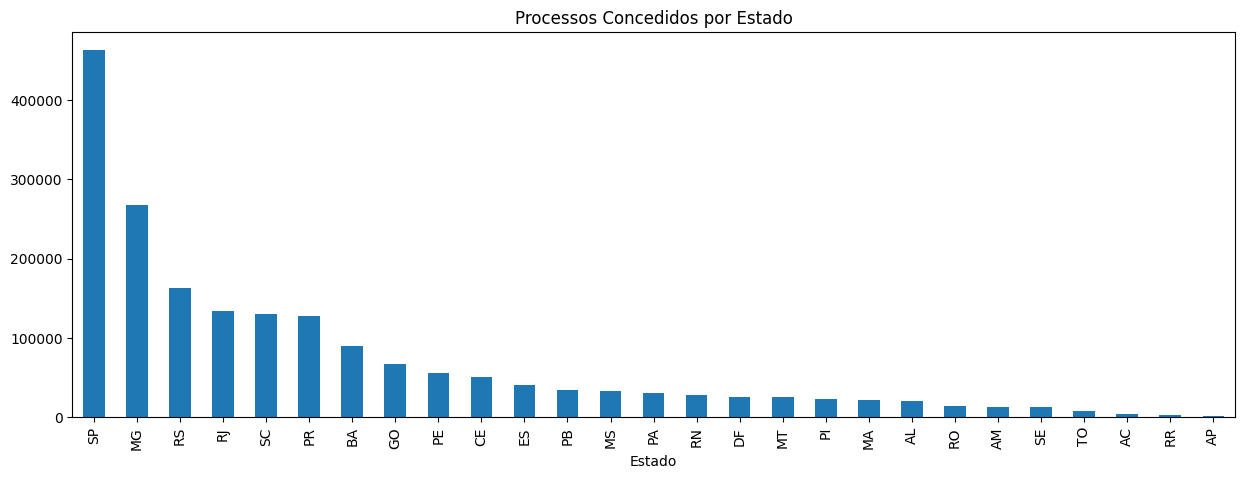

In [23]:
#Plota o gráfico em Histograma de processos concluídos por Estado
#plt.hist(df_ben['Estado'], bins=28, edgecolor='green', color='blue') 
estado = df_ben['Estado'].value_counts()
estado.plot(figsize=(15,5), kind='bar')
plt.title('Processos Concedidos por Estado')
plt.xlabel('Estado')

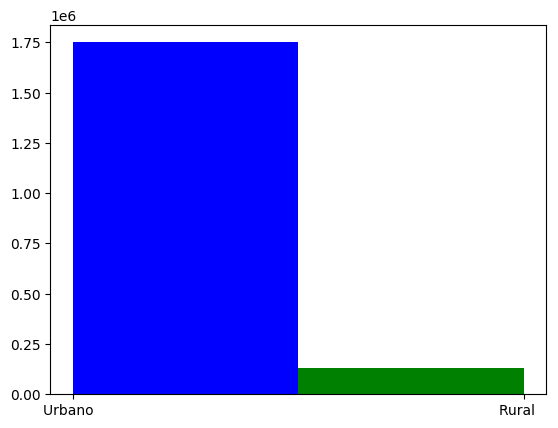

In [24]:
#Plota o gráfico em Histograma de processos concluídos por Zona
fig, ax = plt.subplots()
ax.hist(df_ben['Zona'], bins=2)
cor=['blue', 'green']
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])
#plt.legend();

In [25]:
#Ver como plotar grafico de barras entre espécie e sexo
#plt.bar(df_ben['Espécie'],df_ben['Sexo'])

1.000    661694
1.002      5723
1.005      4220
1.010      3986
1.004      3946
          ...  
0.839         1
0.992         1
6.266         1
0.960         1
5.801         1
Name: Qt SM RMI, Length: 4402, dtype: int64

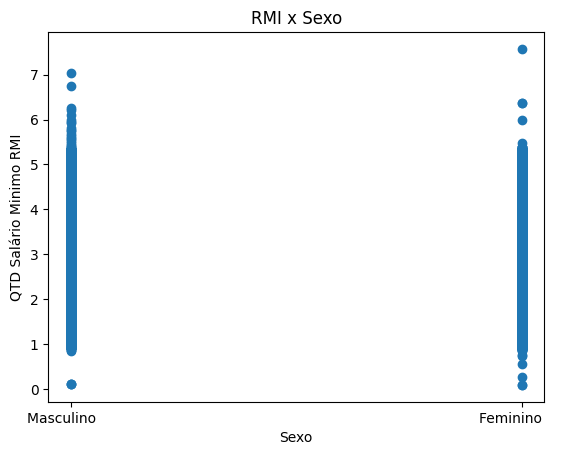

In [26]:
#Plota Gráfico de dispersão Sexo por RMI
plt.scatter(df_ben['Sexo'],df_ben['Qt SM RMI'])
plt.title('RMI x Sexo')
plt.xlabel('Sexo')
plt.ylabel('QTD Salário Minimo RMI')
rmi = df_ben['Qt SM RMI'].value_counts()
rmi

Text(0, 0.5, 'Mês')

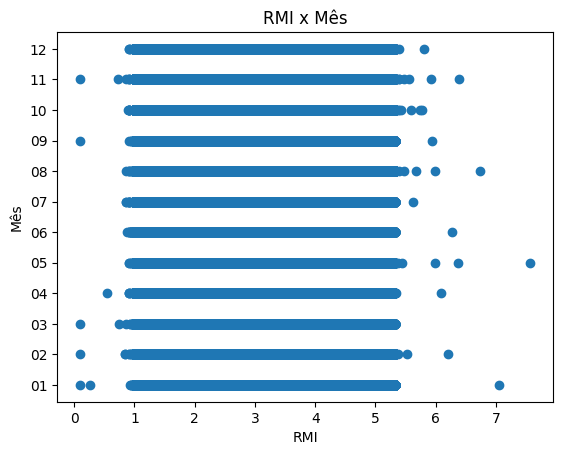

In [27]:
#Plota Gráfico de Dispersão RMI x Competência
plt.scatter(df_ben['Qt SM RMI'],df_ben['Competência'])
plt.title('RMI x Mês')
plt.xlabel('RMI')
plt.ylabel('Mês')

Text(0.5, 1.0, 'Quantidade de Salário Mínimo em 2022')

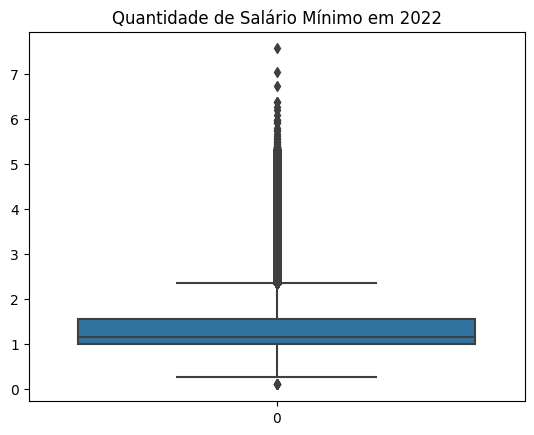

In [28]:
#Plotar Boxplot da Quantidade de Salário Mínimo
sns.boxplot(data = df_ben['Qt SM RMI'])
plt.title('Quantidade de Salário Mínimo em 2022')

,Qt SM RMI
Competência,
01,1.466108
02,1.425653
03,1.412397
04,1.403218
05,1.423238
06,1.433051
07,1.431063
08,1.421689
09,1.423580


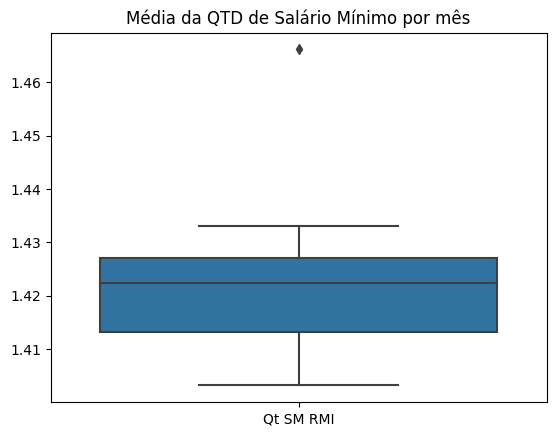

In [29]:
#Plotar Boxplot da Média de Salário Mínimo por mês
rmi_mes = df_ben.loc[:,['Competência','Qt SM RMI']]
rmi_mes = rmi_mes.groupby('Competência').mean()
sns.boxplot(data = rmi_mes)
plt.title('Média da QTD de Salário Mínimo por mês')
display(rmi_mes)

IndexError: ignored

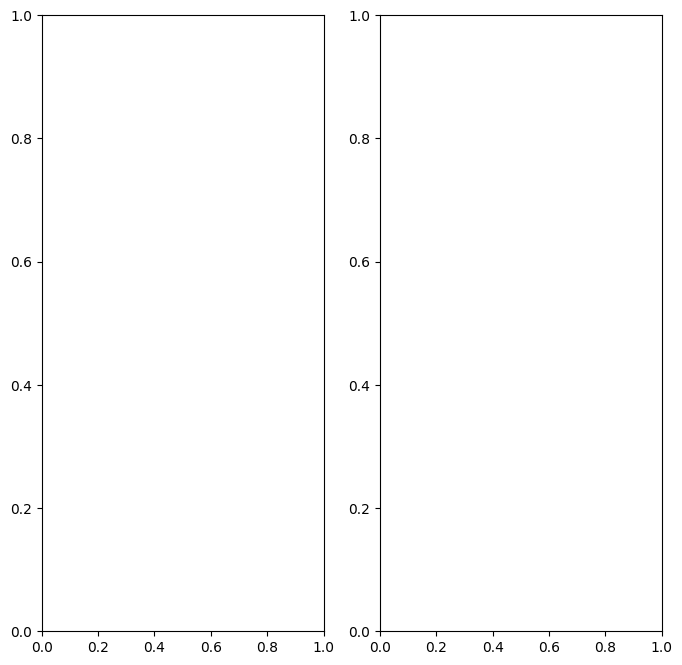

In [32]:
#Plotar SubBoxplot da Média de Salário Mínimo por mês
fig, ax = plt.subplots(1,2, figsize = (8, 8))

# subplot1: histograma do comprimento_sepala
ax[0,0].boxplot(data = df_ben['Qt SM RMI'])
ax[0,0].set_title("'Quantidade de Salário Mínimo em 2022")

# subplot2: histograma da largura_sepala
ax[0,1].boxplot(data = rmi_mes)
ax[0,1].set_title("Média da QTD de Salário Mínimo por mês")

In [ ]:
# Gráfico de Linhas do RMI

# selecionando apenas os atributos para serem plotados em um novo dataframe, sem a classe
atributos = rmi_mes

# criando o eixo x - vai de 0 até a quantidade de linhas do dataset iris - de 0 a 149
x_data = range(0, rmi_mes.shape[0])

# plotando cada atributo
for atributo in atributos: # esse for percorre a lista: ['comprimento_sepala', 'largura_sepala', 'comprimento_petala', 'largura_petala']
    plt.plot(x_data, iris[atributo], label=atributo)
    
# incluindo título do gráfico e legenda
plt.title('Média do RMI')
plt.legend();

In [ ]:
df_ben['Qt SM RMI'].describe()

In [ ]:
#Criação de Filtros
fem = df_ben[df_ben['Sexo'] == 'Feminino']
masc = df_ben[df_ben['Sexo'] == 'Masculino']
judicial = df_ben[df_ben['Despacho'] == 'Acao Judicial']

In [ ]:
df_ben.to_csv('df_beneficio.csv', sep=';')

In [ ]:
# selecionando apenas os atributos para serem plotados em um novo dataframe
#atributos = df_ben[['Competência','Qt SM RMI']]
#display(atributos)
# criando o eixo x - vai de 0 até a quantidade de linhas do dataset
#x_data = range(0, df_ben.shape[0])

# plotando cada atributo
#for atributo in df_ben['Competência']: # esse for percorre a lista:
#  #plt.plot(x_data, df_ben[atributo], label=atributo)
#  plt.plot(x_data, df_ben['Qt SM RMI'], label=atributo)
    
# incluindo título do gráfico e legenda
#plt.title('RMI por Competencia')
#plt.legend();

In [ ]:
#Plotar Gráfico de linhas com a média de RMI por mês
#for competencia in df_ben['Competência']:
#  rmi_mes = df_ben['Qt SM RMI'].value_counts() #mean
#rmi_mes.plot(figsize=(15,5), kind='line')
#plt.title('RMI por Mês')
#plt.xlabel('RMI')

In [ ]:
#Valores de SM por Mês
#plt.plot(df_ben['Competência'],df_ben['Qt SM RMI'])
#sm_mes = df_ben['Qt SM RMI'].mean()
#sm_mes.plot(figsize=(15,5), kind='bar')
#plt.title('SM por Mês')
#plt.xlabel('Competência')

In [ ]:
#Valores de SM médio por Mês
#RMI = df_ben['Qt SM RMI'].mean()
#plt.plot(df_ben['Competência'],RMI)

In [ ]:
#plt.bar(df_ben['Espécie'],df_ben['Sexo'])

In [ ]:
rmi_mes = df_ben.loc[:,['Competência','Qt SM RMI']
rmi_mes = rmi_mes.groupby['Competência'].mean()

## 4 - ML - Treino e Teste

---

